In [1]:
try:
    # install for jupyterlite if needed
    import piplite
    print('installing piplite packages... This may take up to ~5 minutes. If still running, please try refreshing the page.')
    await piplite.install(['mathpad', 'nbformat>=5.6', 'ipywidgets>=7,<8'])
    print('piplite packages installed and ready to go!')
    in_jupyterlite = True

except (ImportError, SyntaxError):
    # not running in jupyterlite
    in_jupyterlite = False

<div style="display: flex; height: 300px;">

![cart spring pendulum diagram](imgs/double_pendulum.png)

&nbsp;

![cart spring pendulum simulation](imgs/double_pendulum_simulation.gif)
</div>

In [2]:
from mathpad import *

theta = "theta(t)" * rad
phi = "phi(t)" * rad
m = "m" * kg
l = "l" * meters
g = "g" * meters / second ** 2

O = R2("O") # Origin

In [3]:
print("Displacement of m1")
r1 = O.from_polar(l, theta - pi/2)
r1

Displacement of m1


[l*sin(theta(t)), -l*cos(theta(t))] wrt. O

In [4]:
print('Velocity of m1')
v1 = diff(r1)
v1

Velocity of m1


[l*cos(theta(t))*Derivative(theta(t), t), l*sin(theta(t))*Derivative(theta(t), t)] wrt. O

In [5]:
print("Displacement of m2")
r2 = r1 + O.from_polar(l, phi - pi/2)
r2

Displacement of m2


[l*sin(phi(t)) + l*sin(theta(t)), -l*cos(phi(t)) - l*cos(theta(t))] wrt. O

In [6]:
print("Velocity of m2")
v2 = diff(r2)
v2

Velocity of m2


[l*cos(phi(t))*Derivative(phi(t), t) + l*cos(theta(t))*Derivative(theta(t), t), l*sin(phi(t))*Derivative(phi(t), t) + l*sin(theta(t))*Derivative(theta(t), t)] wrt. O

In [7]:
from mathpad.mech import euler_lagrange, kinetic_energy, gravitational_energy

print("Total Kinetic Energy")
T = kinetic_energy(m=m, v=v1.norm()) + kinetic_energy(m=m, v=v2.norm())
T

Total Kinetic Energy


0.5*m*(l**2*sin(theta(t))**2*Derivative(theta(t), t)**2 + l**2*cos(theta(t))**2*Derivative(theta(t), t)**2) + 0.5*m*((l*sin(phi(t))*Derivative(phi(t), t) + l*sin(theta(t))*Derivative(theta(t), t))**2 + (l*cos(phi(t))*Derivative(phi(t), t) + l*cos(theta(t))*Derivative(theta(t), t))**2) kilogram*meters**2.0/second**2.0

In [8]:
print("Total Potential Energy")
V = gravitational_energy(m=m, h=r1.j, g=g) \
    + gravitational_energy(m=m, h=r2.j, g=g)
V

Total Potential Energy


-g*l*m*cos(theta(t)) + g*m*(-l*cos(phi(t)) - l*cos(theta(t))) kilogram*meters**2/second**2

In [9]:
print("Theta Dynamics: Lagrange Equation")
theta_dynamics = euler_lagrange(KE=T, PE=V, NCF=0 * N * meter, var=theta)
theta_dynamics

Theta Dynamics: Lagrange Equation


2*g*l*m*sin(theta(t)) + 0.5*m*(2*l**2*sin(theta(t))**2*Derivative(theta(t), (t, 2)) + 2*l**2*cos(theta(t))**2*Derivative(theta(t), (t, 2))) - 0.5*m*(2*l*(l*sin(phi(t))*Derivative(phi(t), t) + l*sin(theta(t))*Derivative(theta(t), t))*cos(theta(t))*Derivative(theta(t), t) - 2*l*(l*cos(phi(t))*Derivative(phi(t), t) + l*cos(theta(t))*Derivative(theta(t), t))*sin(theta(t))*Derivative(theta(t), t)) + 0.5*m*(2*l*(l*sin(phi(t))*Derivative(phi(t), t) + l*sin(theta(t))*Derivative(theta(t), t))*cos(theta(t))*Derivative(theta(t), t) - 2*l*(l*cos(phi(t))*Derivative(phi(t), t) + l*cos(theta(t))*Derivative(theta(t), t))*sin(theta(t))*Derivative(theta(t), t) + 2*l*(-l*sin(phi(t))*Derivative(phi(t), t)**2 - l*sin(theta(t))*Derivative(theta(t), t)**2 + l*cos(phi(t))*Derivative(phi(t), (t, 2)) + l*cos(theta(t))*Derivative(theta(t), (t, 2)))*cos(theta(t)) + 2*l*(l*sin(phi(t))*Derivative(phi(t), (t, 2)) + l*sin(theta(t))*Derivative(theta(t), (t, 2)) + l*cos(phi(t))*Derivative(phi(t), t)**2 + l*cos(theta(t)

In [12]:
print("Phi Dynamics: Lagrange Equation")
phi_dynamics = euler_lagrange(PE=T, KE=V, NCF=0 * N * meter, var=phi)
phi_dynamics

Phi Dynamics: Lagrange Equation


-g*l*m*sin(phi(t)) + 0.5*m*(2*l*(l*sin(phi(t))*Derivative(phi(t), t) + l*sin(theta(t))*Derivative(theta(t), t))*cos(phi(t))*Derivative(phi(t), t) - 2*l*(l*cos(phi(t))*Derivative(phi(t), t) + l*cos(theta(t))*Derivative(theta(t), t))*sin(phi(t))*Derivative(phi(t), t)) - 0.5*m*(2*l*(l*sin(phi(t))*Derivative(phi(t), t) + l*sin(theta(t))*Derivative(theta(t), t))*cos(phi(t))*Derivative(phi(t), t) - 2*l*(l*cos(phi(t))*Derivative(phi(t), t) + l*cos(theta(t))*Derivative(theta(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*l*(-l*sin(phi(t))*Derivative(phi(t), t)**2 - l*sin(theta(t))*Derivative(theta(t), t)**2 + l*cos(phi(t))*Derivative(phi(t), (t, 2)) + l*cos(theta(t))*Derivative(theta(t), (t, 2)))*cos(phi(t)) + 2*l*(l*sin(phi(t))*Derivative(phi(t), (t, 2)) + l*sin(theta(t))*Derivative(theta(t), (t, 2)) + l*cos(phi(t))*Derivative(phi(t), t)**2 + l*cos(theta(t))*Derivative(theta(t), t)**2)*sin(phi(t))) = 0 kilogram*meter**2/(radian*second**2)

# Simulation Results:

Solving subbed Equations...
Solving finished.
Simulating from t=0 to t=5 with a max_step of 0.01.


  0%|          | 0/5 [00:00<?, ?it/s]

Simulation finished. Plotting...


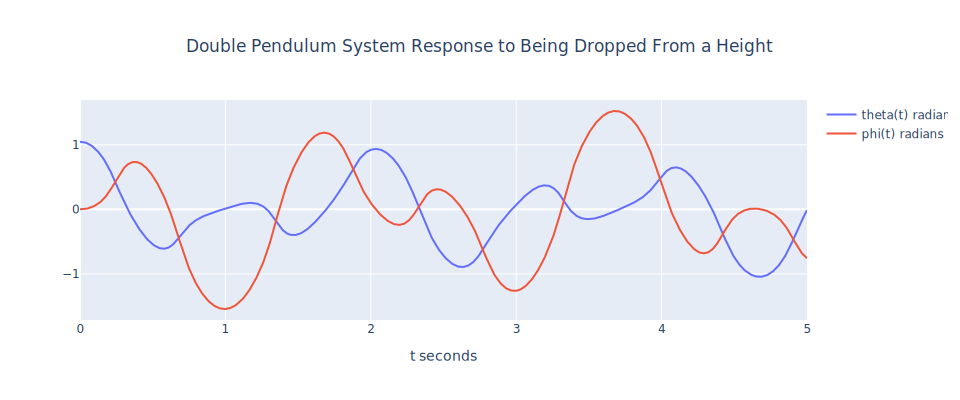

In [13]:
sim_data = simulate_dynamic_system(
    [theta_dynamics, phi_dynamics],
    plot_title="Double Pendulum System Response to Being Dropped From a Height",
    x_final=5, max_step=0.01,
    substitute={
        g: 9.81,
        l: 0.5,
        m: 1
    },
    initial_conditions={
        theta: pi / 3,
        diff(theta): 0,
        phi: 0,
        diff(phi): 0
    },
    record=[theta, phi],
    plot_static=not in_jupyterlite
)
